<a href="https://colab.research.google.com/github/shreesha2304/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import datetime

In [2]:
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 14.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
df = pd.read_excel('/content/drive/My Drive/AlmaBetter/Capstone Project 4/Online Retail.xlsx')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [23]:
df=df.dropna(axis=0)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [25]:
df.duplicated().sum()

5225

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [28]:
df=df[df['Quantity']>=0]
df=df[df['UnitPrice']>=0]


In [29]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [17]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

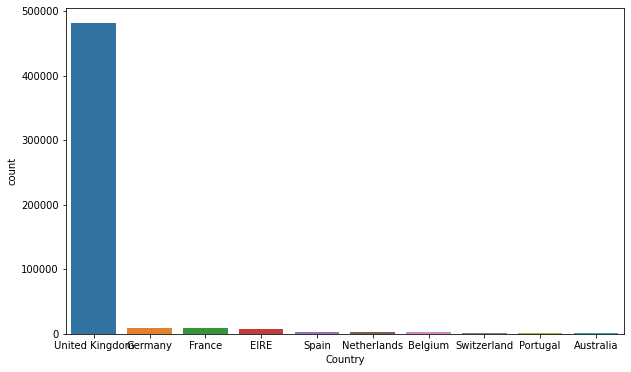

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().iloc[:10].index)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

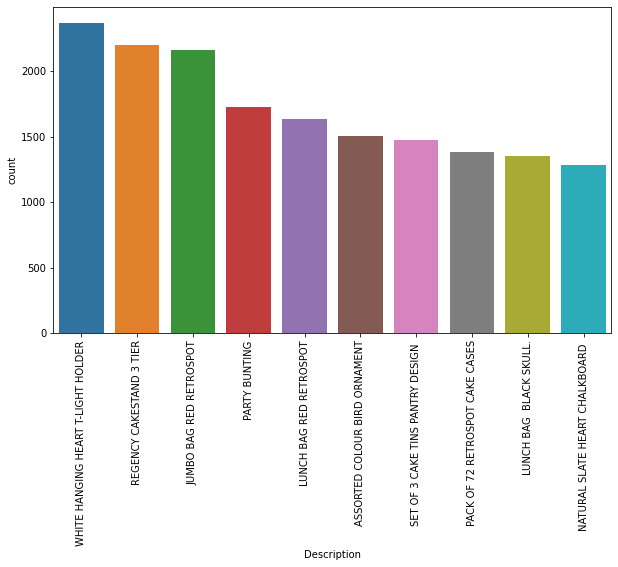

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Description', data=df, order=df['Description'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

In [ ]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [37]:
df['year']=df['InvoiceDate'].dt.year
df['month']=df['InvoiceDate'].dt.month
df['date']=df['InvoiceDate'].dt.day
df['day_of_week']=df['InvoiceDate'].dt.weekday#monday is 0, sunday is 6
df['hour']=df['InvoiceDate'].dt.hour
df['min']=df['InvoiceDate'].dt.minute


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,year,month,date,day_of_week,hour,min
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010,12,1,2,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,2,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010,12,1,2,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,2,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,2,8,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,2011,12,9,4,12,50
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,2011,12,9,4,12,50
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,2011,12,9,4,12,50
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,2011,12,9,4,12,50


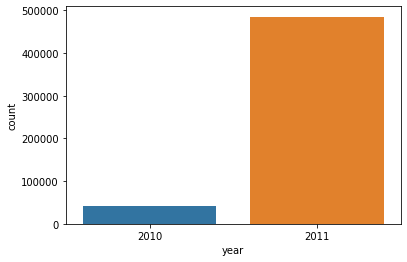

In [ ]:
sns.countplot(x='year',data=df)

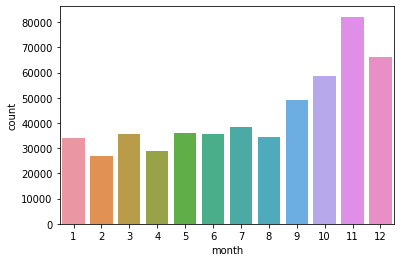

In [ ]:
sns.countplot(x='month', data=df)

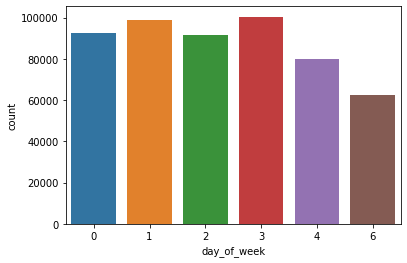

In [ ]:
sns.countplot(x='day_of_week',data=df)

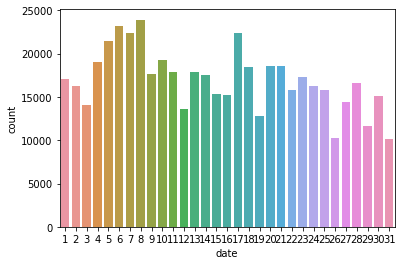

In [ ]:
sns.countplot(x='date',data=df)

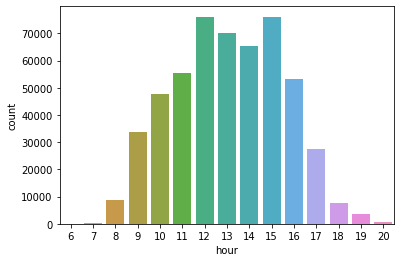

In [ ]:
sns.countplot(x='hour',data=df)

In [38]:
df['net_amount']=df['Quantity']*df['UnitPrice']

In [ ]:
country_amt=pd.DataFrame(df.groupby(['Country'])['net_amount'].mean()).sort_values(by='net_amount',ascending=False).reset_index()

<BarContainer object of 10 artists>

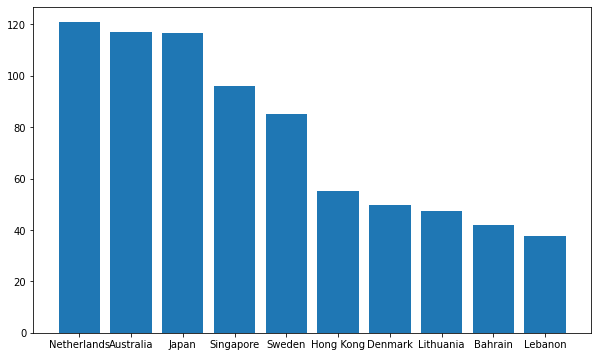

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(x=country_amt['Country'].iloc[:10], height=country_amt['net_amount'].iloc[:10])

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,year,month,date,day_of_week,hour,min,net_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010,12,1,2,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,2,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010,12,1,2,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,2,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,1,2,8,26,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,2011,12,9,4,12,50,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,2011,12,9,4,12,50,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,2011,12,9,4,12,50,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,2011,12,9,4,12,50,16.60


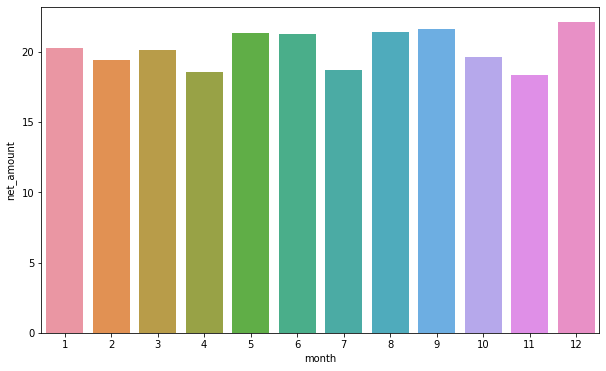

In [ ]:
monthly_amt=pd.DataFrame(df.groupby(['month'])['net_amount'].mean()).sort_values(by='net_amount',ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_amt['month'], y=monthly_amt['net_amount'])


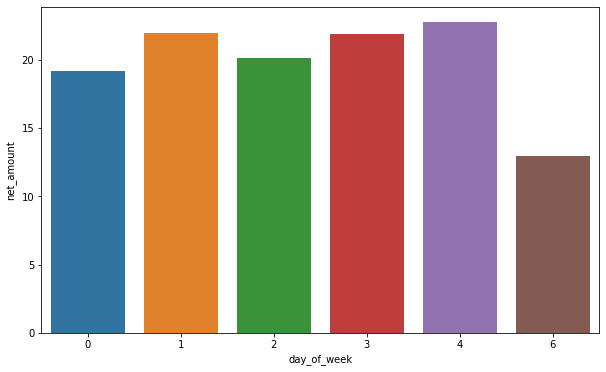

In [ ]:
weekday_amt=pd.DataFrame(df.groupby(['day_of_week'])['net_amount'].mean()).sort_values(by='net_amount',ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=weekday_amt['day_of_week'], y=weekday_amt['net_amount'])

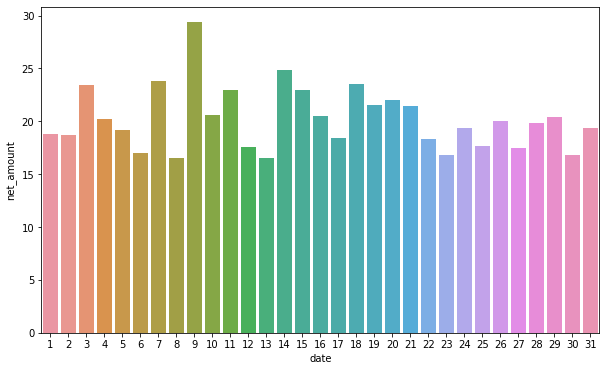

In [ ]:
date_amt=pd.DataFrame(df.groupby(['date'])['net_amount'].mean()).sort_values(by='net_amount',ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=date_amt['date'], y=date_amt['net_amount'])

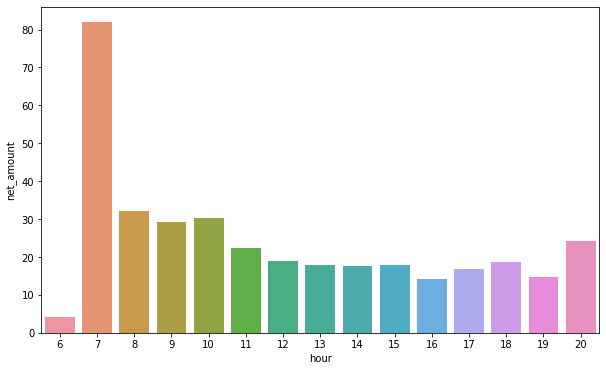

In [ ]:
hourly_amt=pd.DataFrame(df.groupby(['hour'])['net_amount'].mean()).sort_values(by='net_amount',ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_amt['hour'], y=hourly_amt['net_amount'])

In [79]:
cust_freq=df.groupby(['CustomerID']).InvoiceNo.count().reset_index()
cust_freq.rename(columns={'InvoiceNo':'Frequency'},inplace=True)

In [80]:
cust_trans=df.groupby(['CustomerID']).net_amount.sum().reset_index()
cust_trans.rename(columns={'net_amount':'total_amount'},inplace=True)

In [81]:
customer_info=pd.merge(cust_freq,cust_trans,on='CustomerID')

In [82]:
customer_info

,CustomerID,Frequency,total_amount
0,12346.0,1,77183.60
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40
...,...,...,...
4334,18280.0,10,180.60
4335,18281.0,7,80.82
4336,18282.0,12,178.05
4337,18283.0,721,2045.53


In [83]:
df['time_diff']=df['InvoiceDate'].max()-df['InvoiceDate']

In [84]:
time_diff_df=df.groupby(['CustomerID']).time_diff.min().reset_index()
time_diff_df.rename(columns={'time_diff':'recent_purchase'},inplace=True)
# time_diff_df

In [85]:
df_new=pd.merge(customer_info,time_diff_df, on='CustomerID')

In [86]:
df_new

,CustomerID,Frequency,total_amount,recent_purchase
0,12346.0,1,77183.60,325 days 02:49:00
1,12347.0,182,4310.00,1 days 20:58:00
2,12348.0,31,1797.24,74 days 23:37:00
3,12349.0,73,1757.55,18 days 02:59:00
4,12350.0,17,334.40,309 days 20:49:00
...,...,...,...,...
4334,18280.0,10,180.60,277 days 02:58:00
4335,18281.0,7,80.82,180 days 01:57:00
4336,18282.0,12,178.05,7 days 01:07:00
4337,18283.0,721,2045.53,3 days 00:48:00


In [75]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       4339 non-null   float64
 1   InvoiceNo        4339 non-null   int64  
 2   total_amount     4339 non-null   float64
 3   recent_purchase  4339 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 169.5 KB


In [87]:
df_new['recent_purchase'] = df_new['recent_purchase'].dt.days

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


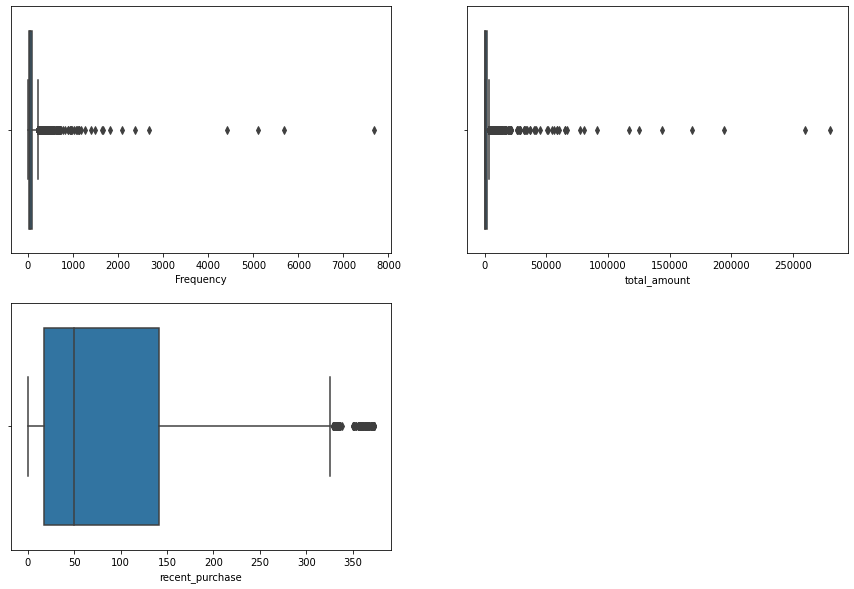

In [88]:
plt.figure(figsize=(15,10))
n =1;
for i in df_new.columns[1:]:
  plt.subplot(2,2,n)
  sns.boxplot(df_new[i])
  n+=1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


19.341402694657173

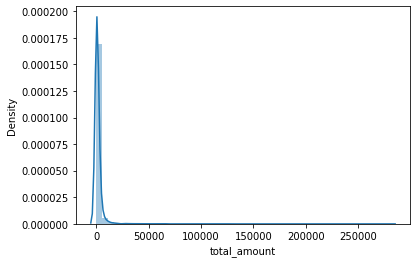

In [92]:
sns.distplot(df_new['total_amount'])
df_new['total_amount'].skew()

In [96]:
df_new['total_amount'].describe()

count      4339.000000
mean       2048.215924
std        8984.248352
min           0.000000
25%         306.455000
50%         668.560000
75%        1660.315000
max      280206.020000
Name: total_amount, dtype: float64

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


OverflowError: ignored

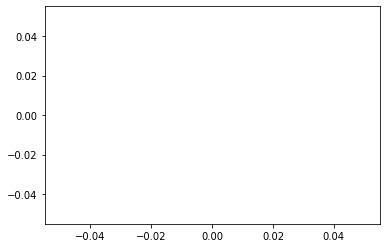

In [104]:
df_new['log_total_amount']= np.log10(df_new['total_amount'])
sns.distplot(df_new['log_total_amount'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


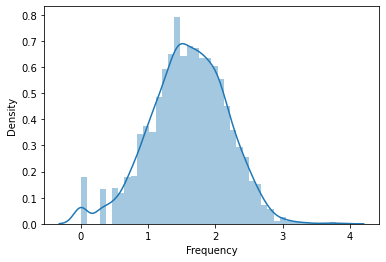

In [90]:
sns.distplot(np.log10(df_new['Frequency']))